# Quantum Coding Practice
I am going to demonstrate a simple circuit using a 2 qubit register with a corresponding 2 regular bit register; I will enact a hadamard on one and then a cnot on the other targetting the qubit with a hadamard enacted upon it, this shoudl make both qubits have around a 50/50 chance to be read together as 00 or as 01, essentially giving two probabilities as the results; this has been described in the form of  a coinflip but a qubit is really much more interesting and useful than a coin could ever be.

First I Have to load in the right modules/plug-ins:

In [13]:
import numpy as np
import matplotlib as mpl
import pandas as pd
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute,  transpile, Aer, IBMQ, BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
# provider = IBMQ.load_account()

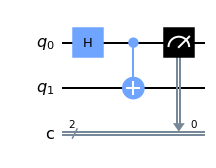

In [60]:
mfc = QuantumCircuit(2, 2)
mfc.h(0)
mfc.cx(0, 1)
mfc.measure(range(1), range(1))
mfc.draw(output='mpl')

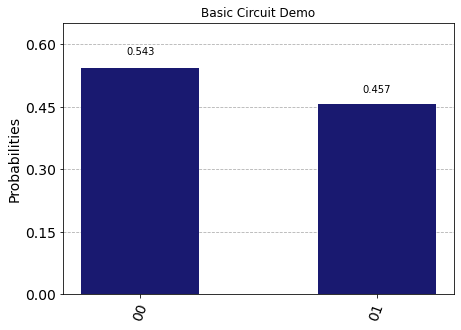

In [66]:
backend = BasicAer.get_backend('qasm_simulator')
mfcresultz = execute(mfc, backend)
plot_histogram(mfcresultz.result().get_counts(), color='midnightblue', title="Basic Circuit Demo")

As you can see the reads are accurate to what I expected and there is around a 50% chance for either of these outputs to be the result of this, this is primarily because of the hadamard and the fact it puts a qubit into a superpositional state, then the cnot is tethered to this from one qubit to another, it essentially says if the 2nd qubit is a $|1\rangle$ state, then the other qubit must flip its state.

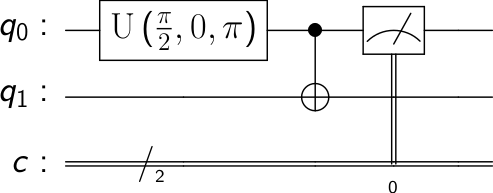

In [62]:
transpiled_mfc = transpile(mfc, basis_gates=['u', 'cx', 'rz', 'sz'])
transpiled_mfc.draw(output='latex')

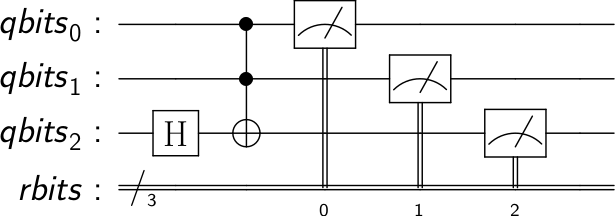

In [47]:
Qubitz = QuantumRegister(3, 'qbits')
RegBitz = ClassicalRegister(3, 'rbits')
msc = QuantumCircuit(Qubitz, RegBitz)
msc.h(Qubitz[2])
msc.ccx(Qubitz[0], Qubitz[1], Qubitz[2])
msc.measure(Qubitz, RegBitz)
msc.draw(output='latex')

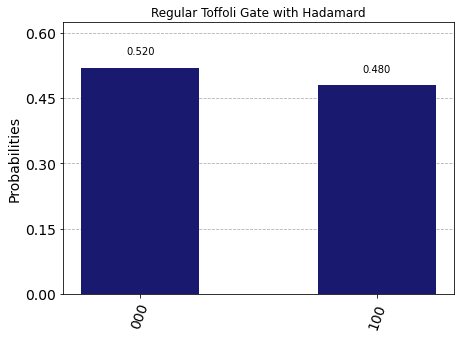

In [46]:
mscjob = execute(msc, backend)
plot_histogram(mscjob.result().get_counts(), color='midnightblue', title='Regular Toffoli Gate with Hadamard')

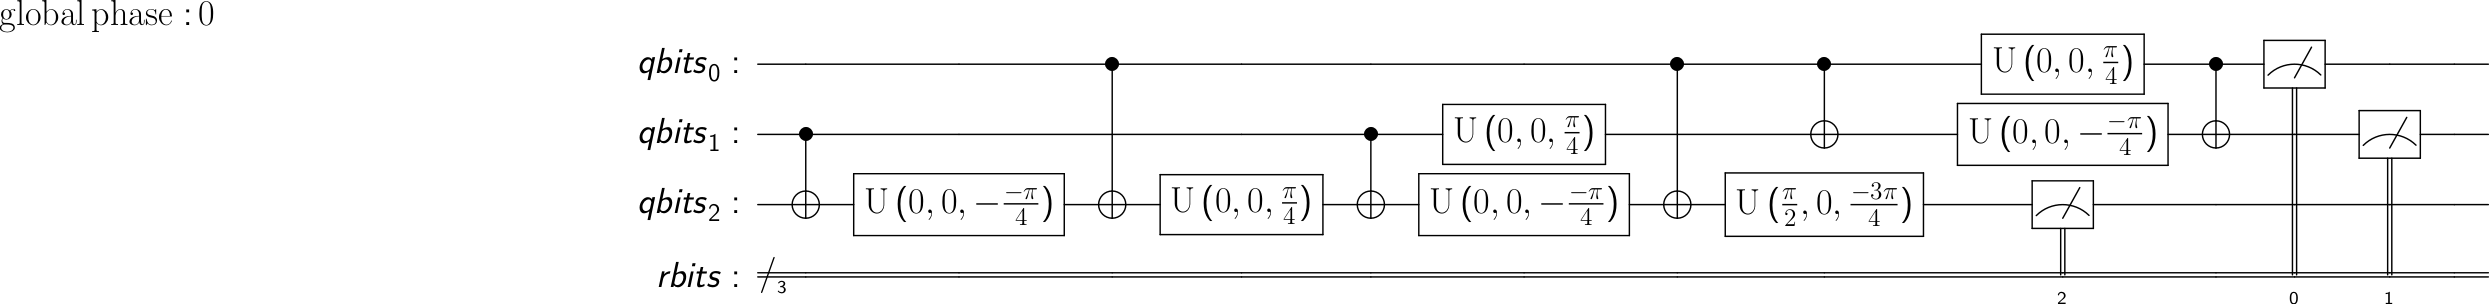

In [56]:
decompiled_msc = transpile(msc, basis_gates=['u', 'cx', 'rz', 'sx'])
decompiled_msc.draw(output='latex')

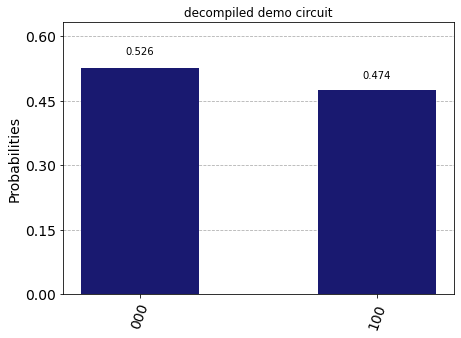

In [55]:
decompile_job = execute(decompiled_msc, backend)
plot_histogram(decompile_job.result().get_counts(), color='midnightblue', title='decompiled demo circuit')